# Loading Data

In [73]:
import numpy

data = numpy.loadtxt("../catalog/gcmt_delimited.csv", delimiter=",")
headers = ["eventID","year","month","day","hour","minute",
           "second","latitude","longitude","depth","magnitude"]

In [74]:
from openquake.hmtk.seismicity.catalogue import Catalogue
catalogue = Catalogue()

catalogue.load_from_array(headers, data)

# Plotting

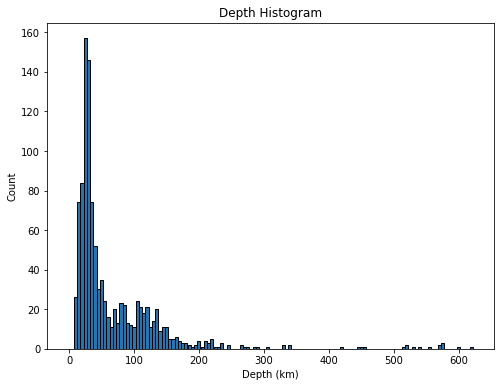

In [28]:
from openquake.hmtk.plotting.seismicity.catalogue_plots import plot_depth_histogram

depth_bin = 5.0

plot_depth_histogram(catalogue, depth_bin, filename="depth_hist.png", filetype="png")


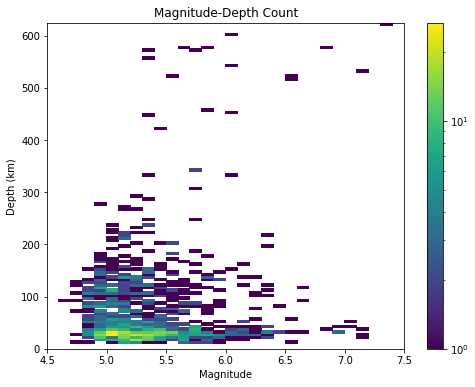

In [33]:
from openquake.hmtk.plotting.seismicity.catalogue_plots import plot_magnitude_depth_density

magnitude_bin =  .1
depth_bin = 5

plot_magnitude_depth_density(
    catalogue,
    magnitude_bin,
    depth_bin,
    logscale=True,
    filename="mag_depth_dens.png")

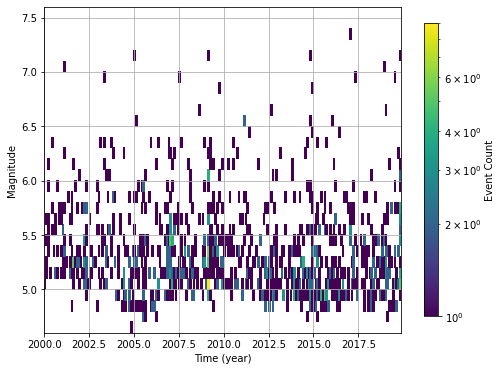

In [35]:
from openquake.hmtk.plotting.seismicity.catalogue_plots import plot_magnitude_time_density

magnitude_bin = .1
time_bin = .1

plot_magnitude_time_density(
    catalogue,
    magnitude_bin,
    time_bin,
    filename="mag_time_dens.png")

# Declustering

## Gardner and Knopoff (1974)

In [92]:
from openquake.hmtk.seismicity.declusterer.distance_time_windows import UhrhammerWindow
declust_config = {
    'time_distance_window': UhrhammerWindow(),
    'fs_time_prop': 1.0}

In [93]:
from openquake.hmtk.seismicity.declusterer.dec_gardner_knopoff import GardnerKnopoffType1
declustering = GardnerKnopoffType1()

cluster_index,cluster_flag = declustering.decluster (
    catalogue,
    declust_config )

In [94]:
catalogue.data["cluster_index"] = cluster_index
catalogue.data["cluster_flag"] = cluster_flag

In [95]:
mainshock_flag = cluster_flag == 0
catalogue.purge_catalogue(mainshock_flag)


In [98]:
catalogue.data

{'depthError': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# Mc

In [52]:
comp_config = {
    'magnitude_bin': .5,
    'time_bin': 5.,
    'increment_lock': True
}

In [54]:
from openquake.hmtk.seismicity.completeness.comp_stepp_1971 import Stepp1971
completeness_algorithm = Stepp1971()
completeness_table = completeness_algorithm.completeness(
    catalogue,
    comp_config)

completeness_table

array([[2007. ,    4.5],
       [2002. ,    5. ],
       [2002. ,    5.5],
       [1999. ,    6. ],
       [1999. ,    6.5],
       [1999. ,    7. ]])

# Recurrence Models

## ML

In [55]:
mle_config = {
    'magnitude_interval': .1,
    "Average Type": "Weighted",
    'reference_magnitude': None
}

In [59]:
from openquake.hmtk.seismicity.occurrence.b_maximum_likelihood import BMaxLikelihood

recurrence = BMaxLikelihood()

bval, sigmab, aval, sigmaa =  recurrence.calculate(
    catalogue,
    mle_config,
    completeness_table)

print("bval: ", bval)
print("sigmab: ", sigmab)
print("aval: ", aval)
print("sigmaa: ", sigmaa)

--- ctime 2007.0  m_c 4.5
--- ctime 2002.0  m_c 5.0
--- ctime 1999.0  m_c 6.0
bval:  0.8543244377720048
sigmab:  0.028362675368645753
aval:  5.8962866330180495
sigmaa:  0.12971216530452256


# Maximum Magnitude

## Cumulative Moment

In [62]:
mmax_config = {"number_bootstraps": 1000}

In [66]:
from openquake.hmtk.seismicity.max_magnitude.cumulative_moment_release import CumulativeMoment

mmax_estimator = CumulativeMoment()
mmax, mmax_uncertainty = mmax_estimator.get_mmax(
    catalogue,
    mmax_config)

print("mmax", mmax)
print("mmax_sigma", mmax_uncertainty)

mmax 7.5110150896668975
mmax_sigma 1.777245684509363e-15


# Smoothed Seismicity

Out of the main process

In [70]:
import numpy

data = numpy.loadtxt("../catalog/gcmt_delimited.csv", delimiter=",")
headers = ["eventID","year","month","day","hour","minute",
           "second","latitude","longitude","depth","magnitude"]

from openquake.hmtk.seismicity.catalogue import Catalogue
catalogue = Catalogue()

catalogue.load_from_array(headers, data)

catalogue.data

{'month': array([12, 12, 12, ...,  2,  2,  1]),
 'day': array([29, 28, 25, ..., 10,  6, 29]),
 'minute': array([12, 25, 56, ...,  3,  8, 53]),
 'depthError': array([], dtype=float64),
 'magnitude': array([5.4, 4.8, 5.3, ..., 5.4, 5.4, 5. ]),
 'flag': array([], dtype=int64),
 'ErrorStrike': array([], dtype=float64),
 'longitude': array([125.3 , 128.43, 126.73, ..., 126.32, 126.38, 126.38]),
 'hour': array([ 9, 18, 16, ...,  4,  2,  2]),
 'depth': array([21.2, 53.1, 26.6, ..., 23.4, 37.2, 88.2]),
 'year': array([2019, 2019, 2019, ..., 2000, 2000, 2000]),
 'Agency': [],
 'timeError': array([], dtype=float64),
 'second': array([17., 45., 25., ..., 41., 14., 57.]),
 'SemiMinor90': array([], dtype=float64),
 'eventID': array([11163479., 11163305., 11162348., ...,   895169.,   884318.,
          980693.]),
 'SemiMajor90': array([], dtype=float64),
 'comment': [],
 'sigmaMagnitude': array([], dtype=float64),
 'latitude': array([4.72, 1.42, 4.03, ..., 1.19, 1.52, 4.98]),
 'magnitudeType': []}

In [75]:
from openquake.hmtk.seismicity.smoothing.smoothed_seismicity import SmoothedSeismicity
from openquake.hmtk.seismicity.smoothing.kernels.isotropic_gaussian import IsotropicGaussian

# frid limit
# min max spac long
# min lat mamx lat
# spac lat, mindepth, max_depth, spac depth

data = catalogue.data

grid_limits = [
    np.min(data['longitude']),
    np.max(data['longitude']),
    .1,
    np.min(data['latitude']),
    np.max(data['latitude']),
    .1,
    0.,
    60.,
    10.,
]

smooth_seis = SmoothedSeismicity(
    grid_limits,
    use_3d=True,
    bvalue=.8)

smooth_seis

In [78]:
config = {'Length_Limit': 3.,
         'BandWidth': 50.,
         'increment': True}

output_data = smooth_seis.run_analysis(
    catalogue,
    config,
    completeness_table,
    smoothing_kernel=IsotropicGaussian())

Smoothing Total Rate Comparison - Observed: 351913, Smoothed: 368733


In [79]:
smooth_seis.write_to_csv("smoothed_seis.csv")

# Plotting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
m = Basemap(llcrnrlon=-100.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-60.,
            resolution ='l',area_thresh=1000.)

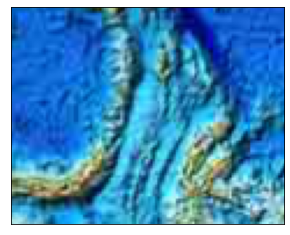

In [11]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

m = Basemap(llcrnrlon=122.476,llcrnrlat=-0.36,urcrnrlon=130.298,urcrnrlat=5.87)
#m = Basemap(llcrnrlon=122.476,llcrnrlat=-0.36,urcrnrlon=160.298,urcrnrlat=30.87, resolution=None)
# can get the identical map this way (by specifying width and
# height instead of lat/lon corners)
#m = Basemap(width=894887,height=1116766,
#            resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7)
#m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
# draw parallels and meridians.
#m.drawparallels(np.arange(-40,61.,2.))
#m.drawmeridians(np.arange(-20.,21.,2.))
#m.drawmapboundary(fill_color='aqua')
m.etopo()
plt.savefig("etopo.png", dpi=240)
plt.show()

In [9]:
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)